In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DailyDelhiClimate.csv', index_col=0, parse_dates=True)
df.index.freq = 'd'
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Freq: D
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [4]:
df.columns = ['Mean Temperature', 'Humidity', 'Wind Speed', 'Mean Pressure']

In [5]:
import matplotlib.pyplot as plt
from matplotlib import dates

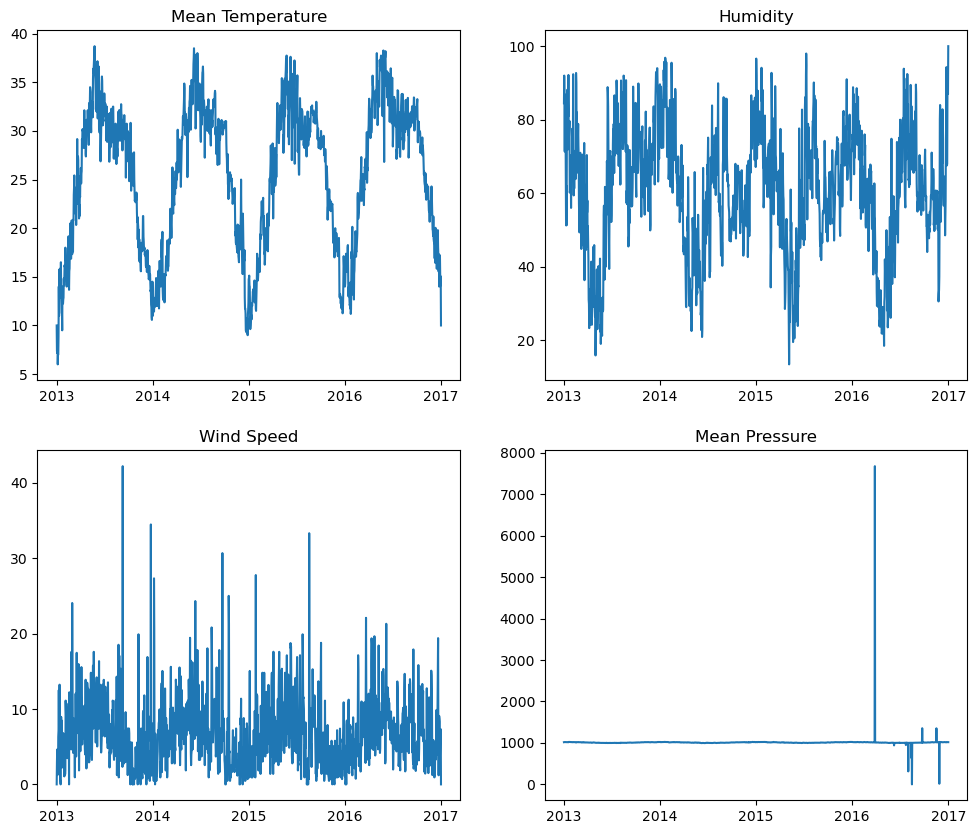

In [6]:
plt.figure(figsize = (12,10))
for i,j in enumerate(df.columns):
    ax = plt.subplot(2,2,i+1)
    ax.plot(df[j])
    ax.set(title=j)
    ax.xaxis.set_major_locator(dates.YearLocator())

## Mean Temperature

<AxesSubplot:xlabel='date'>

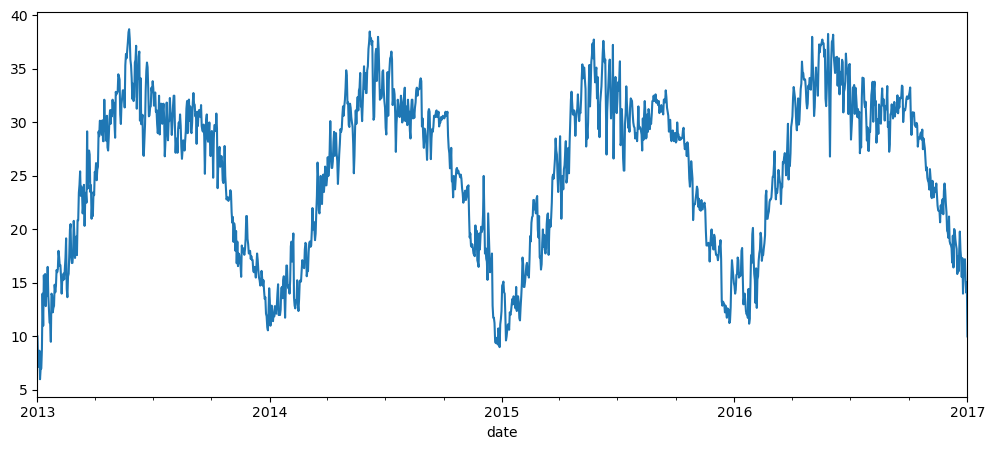

In [7]:
df['Mean Temperature'].plot(figsize = (12,5))

- The data seems to fluctuate more or less the same way over time, so we can assume that the variance is constant.
- The average seems stable and is somewhere between 20 and 25 but
- **There is seasonality**

Therefore, we cannot say that the data is stationary.

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
print("Dickey-Fuller-value : ", adfuller(df['Mean Temperature'])[1])

Dickey-Fuller-value :  0.27741213723016056


Dickey-Fuller test confirms that the data is not stationary.

In [10]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from pandas.plotting import lag_plot

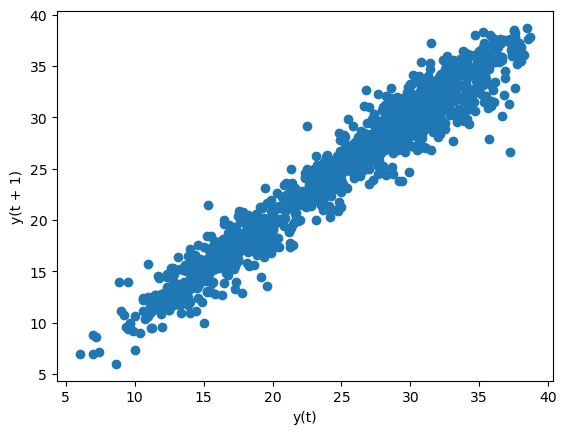

In [11]:
lag_plot(df['Mean Temperature']);

There is an identifiable pattern here. Autocorrelation exists.

<Figure size 1200x1000 with 0 Axes>

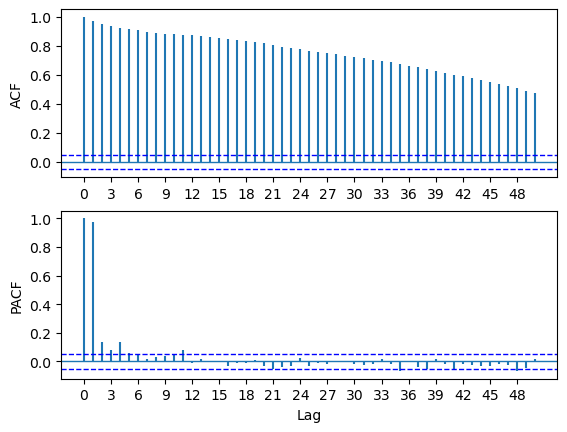

In [12]:
plt.figure(figsize = (12,10))
acf_pacf_fig(df['Mean Temperature'], both=True, lag=50)

ACF is decaying slowly and PACF is decaying rapidly after the first lag. An AR Model would be suitable to model the data.

## Humidity

<AxesSubplot:xlabel='date'>

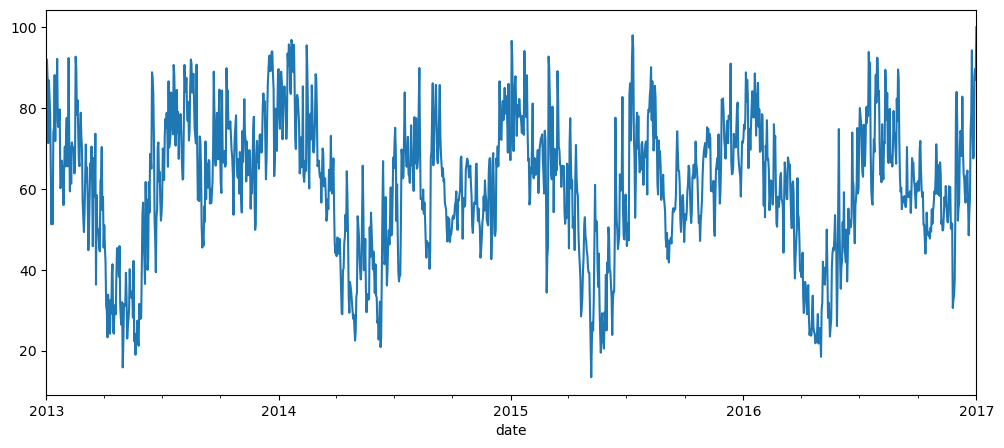

In [13]:
df['Humidity'].plot(figsize = (12,5))

- Mean and variance seem to be constant.
- There seem to be some seasonality but it looks better than the 'Mean Temperature'

This one might be classified as "stationary". Let's check using Dickey Fuller test.

In [14]:
print("Dickey-Fuller-value : ", adfuller(df['Humidity'])[1])

Dickey-Fuller-value :  0.00447010047813078


P value is smaller than 0.05, so we reject the null hypothesis that the data is non-stationary.

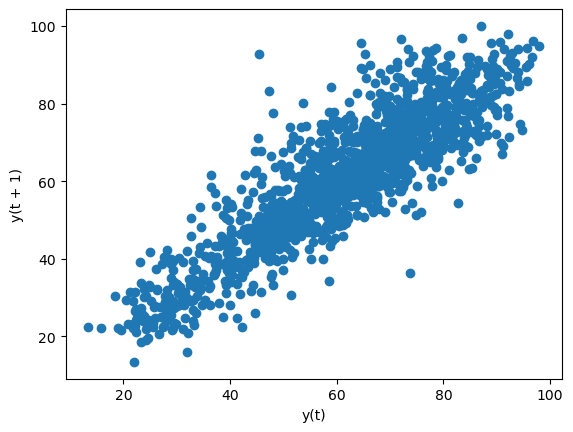

In [15]:
lag_plot(df['Humidity']);

Series is autocorrelated.

<Figure size 1200x1000 with 0 Axes>

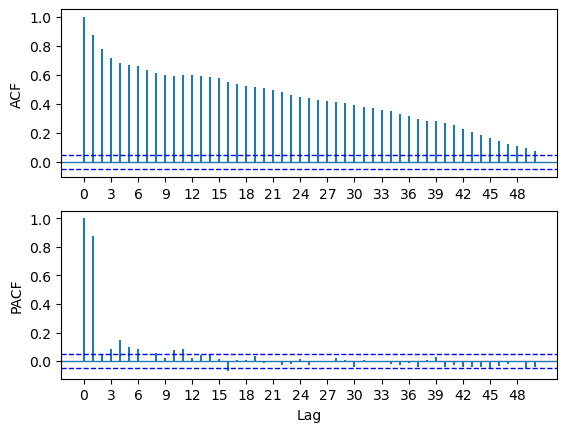

In [16]:
plt.figure(figsize = (12,10))
acf_pacf_fig(df['Humidity'], both=True, lag=50)

ACF is decaying slowly and PACF is decaying rapidly after the first lag. An AR Model would be suitable to model the data.

<AxesSubplot:xlabel='date'>

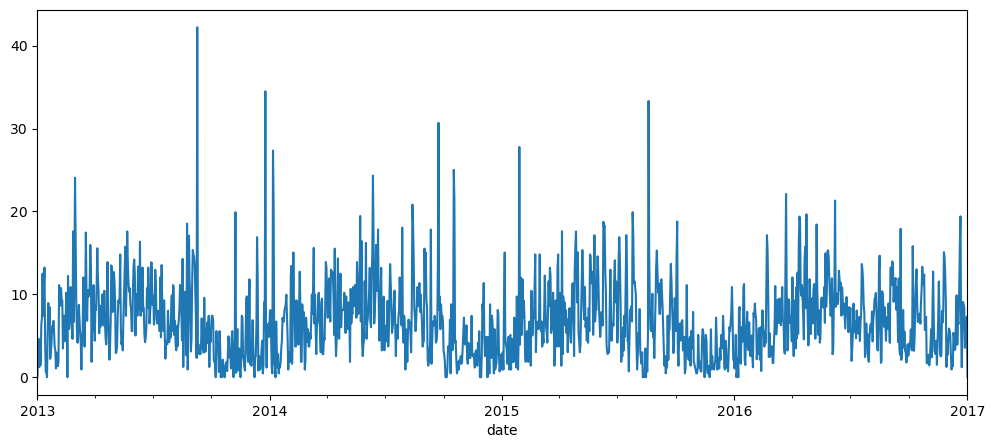

In [17]:
df['Wind Speed'].plot(figsize = (12,5))

- Mean seems to be constant.
- Varance seems generally constant.
- Seasonality seems even weaker.

Data seems to be stationary. Let's check using Dickey Fuller test.

In [18]:
print("Dickey-Fuller-value : ", adfuller(df['Wind Speed'])[1])

Dickey-Fuller-value :  0.0025407221531464352


P value is smaller than 0.05, so we reject the null hypothesis that the data is non-stationary.

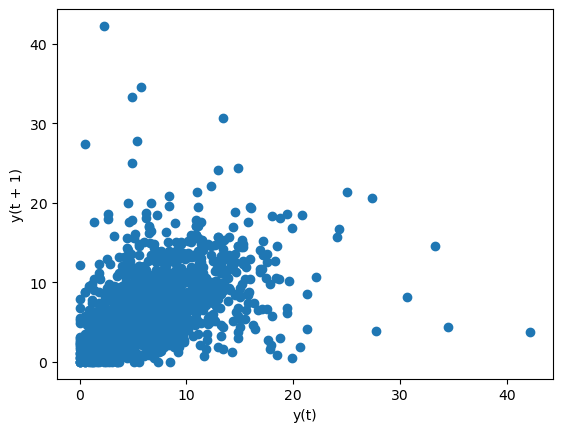

In [19]:
lag_plot(df['Wind Speed']);

Autocorrelatin is weaker than the rest.

<Figure size 1200x1000 with 0 Axes>

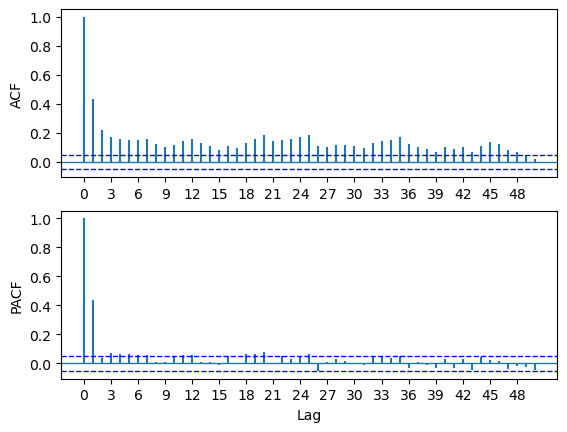

In [20]:
plt.figure(figsize = (12,10))
acf_pacf_fig(df['Wind Speed'], both=True, lag=50)

Both ACF and PACF are decaying rapidly. An ARMA Model would be suitable to model the data.

## Mean Pressure

<AxesSubplot:xlabel='date'>

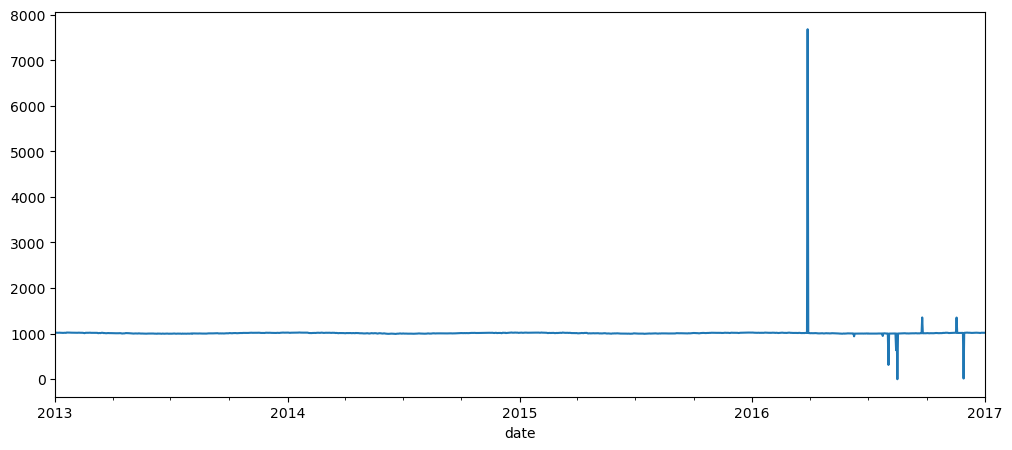

In [21]:
df['Mean Pressure'].plot(figsize = (12,5))

Data seems to be a flat line with a few outliers.

In [22]:
print("Dickey-Fuller-value : ", adfuller(df['Mean Pressure'])[1])

Dickey-Fuller-value :  0.0


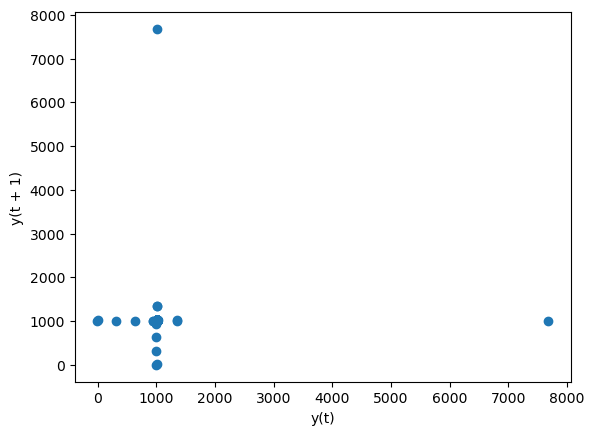

In [23]:
lag_plot(df['Mean Pressure']);

<Figure size 1200x1000 with 0 Axes>

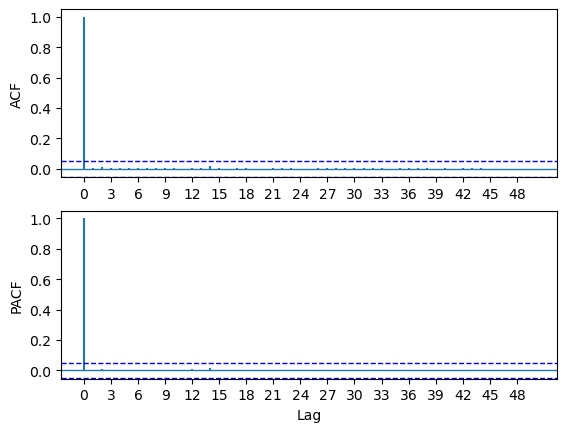

In [24]:
plt.figure(figsize = (12,10))
acf_pacf_fig(df['Mean Pressure'], both=True, lag=50)

A flat line would be the most accurate model for this data.